### Image Preprocessing - OpenCV

- Author: Phanxuan Phuc
- Project: https://github.com/phanxuanphucnd/freelearningcv

### Vai trò của tiền xử lý ảnh

Khi xây dựng, phát triển một thuật toán phân loại ảnh, chúng ta có thể gặp 1 số trường hợp không như kỳ vọng: Kết quả huấn luyện có độ chính xác cao trên cả `train dataset` và `dev dataset`, nhưng khi áp dụng vào thực tế nó lại cho độ chính xác thấp. Có nhiều nguyên nhân dẫn tới vấn đề này, một trong số đó có thể nghĩ tới:

- Các bức ảnh được huấn luyện khác xa so với những bức ảnh người dùng upload trong thực tế về các khía cạnh như: độ phân giải, cường độ màu sắc, chất lượng ảnh, độ to nhỏ của vật thể, chiều, hướng, và tư thế của các vật thể bên trong ảnh;
- Có thể các bức ảnh người dùng upload lên mặc dù cùng nhãn nhưng khác về tính chất so với các bức ảnh đã được huấn luyện. Ví dụ, trong một thuật toán phân loại `dog` và `cat`, `train dataset` chỉ bao gồm những con mèo trưởng thành nhưng thực tế người dùng lại upload lên rất nhiều hình ảnh của mèo con có thể dẫn đến thuật toán bị nhầm lẫn;
- Đối với một số tác vụ phân loại ảnh khó, đòi hỏi chuyên gia gán nhãn, rất dễ mắc sai lầm như chuẩn đoán bệnh nhãn cầu, ... Một số ít các ảnh trong `train dataset` có thể bị gán nhãn sai -> ảnh hưởng tới khả năng dự đoán của thuật toán;
- Bộ `train dataset` có kích thước quá nhỏ và không đại diện đủ cho toàn bộ các class được huấn luyện;
- Phân phối của `train dataset` khác xa so với thực tế. Chẳng hạn `tran dataset` chứa ảnh chó mèo tỉ lệ 50:50 nhưng số lượng ảnh người dùng upload lên ảnh `dog` chiếm đa số theo tỉ lệ `90:10`.

Và rất nhiều nguyên nhân khác dẫn tới thuật toán hoạt động không được như kì vọng. Khi đối mặt với các trường hợp trên chúng ta cần phải tìm ra nguyên nhân thực sự là gì và từ đó đưa ra những phương án thích hợp để khắc phục các lỗi mô hình. Các kỹ thuật để giải quyết các trường hợp lỗi như vậy đã được tổng hợp trong cuốn sách **[Khao khát học máy - Andrew Ng](https://github.com/phanxuanphucnd/book4ai/blob/main/Kh%C3%A1t%20Khao%20H%E1%BB%8Dc%20M%C3%A1y%20(Machine%20Learning%20Yearning.pdf)**. Một số hướng giải quyết tác giả nêu ra như: Thay đổi tập `train dataset` và `dev dataset`, thống kê lỗi và tìm cách giải quyết các lỗi chính mang lại cải thiện lớn, xác định `train dataset`/ `dev dataset` và phép đo đơn trị thích hợp ngay từ đầu cho bài toán, áo dụng các phương phpas và kiến trúc mô hình khác nhau, ...

Trong trường hợp dữ liệu không đủ lớn, dữ liệu gán nhãn với chi phí cao (như chuẩn đoán bệnh qua hình ảnh, phải tìm được bệnh nhân gặp đúng bác sĩ đó và bác sĩ chuyên khoa để chuẩn đoán), việc thay đổi tập dữ liệu là khá tốn chi phí. Có một phương pháp mà có thể giúp gia tăng số lượng ảnh đầu vào đó là `tăng cường dữ liệu` (`data augmentation`) sử dụng dụng các phép biến đổi `tiền xử lý hình ảnh` đầu vào. Đây là một phương pháp hiệu quả nhằm thay đổi tập dữ liệu huấn luyện và từ đó giúp cải thiện hiệu quả dự đoán.

## Tiền xử lý ảnh

### Các biến đổi hình học

Các phép biến đổi hình ảnh từ một hình dạng này sang một hình dạng khác thông qua việc làm thay đổi `phương`, `chiều`, `góc`, `cạnh` mà không làm thay đổi nội dung của ảnh. Về mặt lý thuyết toán học, một phép biến đổi được định nghĩa như sau:

<img src="../imgs/imagepreprocessing1.png" width="100%" height="100%" align="center"/>

=> Để xác định một phép biến đổi hình học, ta cần xác định được ma trận chuyển dịch của nó là gì? _(Ma trận chuyển dịch là đặc trưng để biểu diễn các dạng biến đổi khác nhau)._

#### Phóng đại ảnh (Scale ảnh)

Scale ảnh là việc chúng ta thay đổi kích thước dài, rộng của ảnh mà không làm thay đổi tính chất song song của các đoạn thẳng trên ảnh gốc so với các trục tọa độ X và Y. 

<img src="../imgs/imagepreprocessing2.png" width="100%" height="100%" align="center"/>

In [3]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO

In [16]:
url = 'https://i.imgur.com/QkhPJNL.jpeg'

def _download_image(url):
    resp = requests.get(url)
    img = np.asarray(bytearray(resp.content), dtype="uint8")
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    
    return img

img = _download_image(url)
print(f"Original image shape: {img.shape}")

# Scale image bằng cách gấp đôi with và height

%time
h, w = img.shape[:2]
img_scale = cv2.resize(img, (int(w*2), int(h*2)), interpolation=cv2.INTER_LINEAR)
print(f"Scale image shape: {img_scale.shape}")

Original image shape: (1463, 2197, 3)
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Scale image shape: (2926, 4394, 3)


(<AxesSubplot:title={'center':'Original Image'}>,
 Text(0.5, 1.0, 'Original Image'))

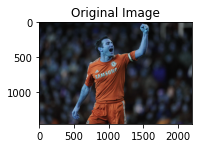

In [17]:
plt.subplot(121),plt.imshow(img),plt.title("Original Image")

(<AxesSubplot:title={'center':'Scaled Image'}>,
 Text(0.5, 1.0, 'Scaled Image'))

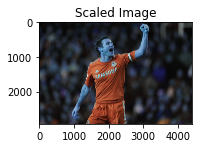

In [18]:
plt.subplot(121),plt.imshow(img_scale),plt.title("Scaled Image")

#### Dịch chuyển ảnh (Translation)

<img src="../imgs/imagepreprocessing3.png" width="100%" height="100%" align="center"/>

(<AxesSubplot:title={'center':'Translate to Bottom Right'}>,
 Text(0.5, 1.0, 'Translate to Bottom Right'))

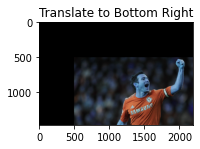

In [21]:
rows, cols = img.shape[:2]

# TODO: Dịch chuyển ảnh xuống gốc dưới phải
tx, ty = (500, 500)
M1 = np.array([[1, 0, tx], 
               [0, 1, ty]], dtype=np.float32)

tran1 = cv2.warpAffine(img, M1, (cols, rows))

plt.figure(figsize=(16, 4))
plt.subplot(152),plt.imshow(tran1),plt.title('Translate to Bottom Right')

(<AxesSubplot:title={'center':'Translate to Bottom Left'}>,
 Text(0.5, 1.0, 'Translate to Bottom Left'))

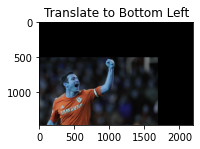

In [23]:
# TODO: Dịch chuyển ảnh xuống góc dưới trái

M2 = np.array([[1, 0, -tx],
               [0, 1, ty]], dtype=np.float32)

tran2 = cv2.warpAffine(img, M2, (cols, rows))

plt.figure(figsize=(16, 4))
plt.subplot(152),plt.imshow(tran2),plt.title('Translate to Bottom Left')

(<AxesSubplot:title={'center':'Translate to Up Left'}>,
 Text(0.5, 1.0, 'Translate to Up Left'))

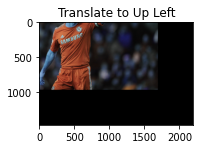

In [26]:
# TODO: Dịch chuyển ảnh xuống góc trên trái

M3 = np.array([[1, 0, -tx],
               [0, 1, -ty]], dtype=np.float32)

tran3 = cv2.warpAffine(img, M3, (cols, rows))

plt.figure(figsize=(16, 4))
plt.subplot(152),plt.imshow(tran3),plt.title('Translate to Up Left')

(<AxesSubplot:title={'center':'Translate to Up Right'}>,
 Text(0.5, 1.0, 'Translate to Up Right'))

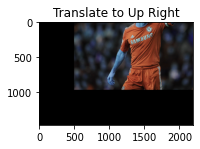

In [27]:
# TODO: Dịch chuyển ảnh xuống góc trên phải

M4 = np.array([[1, 0, tx],
               [0, 1, -ty]], dtype=np.float32)

tran4 = cv2.warpAffine(img, M4, (cols, rows))

plt.figure(figsize=(16, 4))
plt.subplot(152),plt.imshow(tran4),plt.title('Translate to Up Right')

#### Xoay ảnh (Rotation)

<img src="../imgs/imagepreprocessing4.png" width="100%" height="100%" align="center"/>

(<AxesSubplot:title={'center':'Rotate 45 at centroid'}>,
 Text(0.5, 1.0, 'Rotate 45 at centroid'))

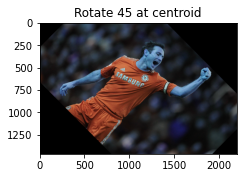

In [30]:
# TODO: Xoay ảnh kích thước 45 độ tại tâm của ảnh, độ phóng đại không đổi

M5 = cv2.getRotationMatrix2D(center=(cols/2, rows/2), angle=-45, scale=1)
tran5 = cv2.warpAffine(img, M5, (cols, rows))

plt.figure(figsize=(12, 8))
plt.subplot(232),plt.imshow(tran5),plt.title('Rotate 45 at centroid')

(<AxesSubplot:title={'center':'Rotate 45 at centroid, resize 1/2'}>,
 Text(0.5, 1.0, 'Rotate 45 at centroid, resize 1/2'))

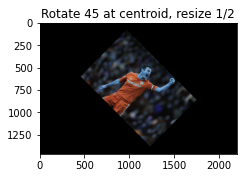

In [31]:
# TODO: Xoay ảnh kích thước 45 độ tại tâm của ảnh, độ phóng đại giảm 1/2

M5 = cv2.getRotationMatrix2D(center=(cols/2, rows/2), angle=-45, scale=1/2)
tran5 = cv2.warpAffine(img, M5, (cols, rows))

plt.figure(figsize=(12, 8))
plt.subplot(232),plt.imshow(tran5),plt.title('Rotate 45 at centroid, resize 1/2')

(<AxesSubplot:title={'center':'Rotate 25 at upper left'}>,
 Text(0.5, 1.0, 'Rotate 25 at upper left'))

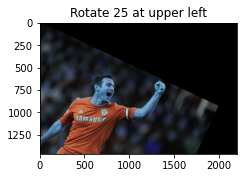

In [33]:
# TODO: Xoay ảnh kích thước 25 độ tại góc trên trái ảnh, độ phóng đại không đổi

M5 = cv2.getRotationMatrix2D(center=(0, 0), angle=-25, scale=1)
tran5 = cv2.warpAffine(img, M5, (cols, rows))

plt.figure(figsize=(12, 8))
plt.subplot(232),plt.imshow(tran5),plt.title('Rotate 25 at upper left')

(<AxesSubplot:title={'center':'Rotate 25 at bottom right'}>,
 Text(0.5, 1.0, 'Rotate 25 at bottom right'))

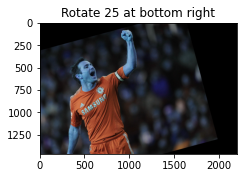

In [40]:
# TODO: Xoay ảnh kích thước 155 độ tại góc dưới phải ảnh, độ phóng đại không đổi

M5 = cv2.getRotationMatrix2D(center=(rows, cols), angle=15, scale=1)
tran5 = cv2.warpAffine(img, M5, (cols, rows))

plt.figure(figsize=(12, 8))
plt.subplot(232),plt.imshow(tran5),plt.title('Rotate 25 at bottom right')